### Path Finder: What are the potential paths between two nodes?
### This pipeline can be used to get a ranked path between A and B given a set of paths.

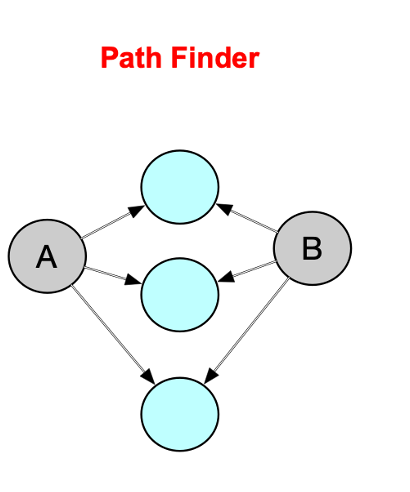


In [10]:
from TCT import TCT

from TCT import node_normalizer
from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import pandas as pd
import  seaborn as sns
import networkx as nx
import numpy as np
import ipycytoscape
import yaml

In [2]:
def load_translator_resources():
    """
    Load the necessary resources for the Translator.
    """
    Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
    metaKG = translator_metakg.get_KP_metadata(APInames) 
    APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
    return  APInames, metaKG, Translator_KP_info


In [3]:
APInames, metaKG, Translator_KP_info= load_translator_resources()

All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))

In [4]:
# select a list of APIs to use and a list of predicates to use
selected_APIlist = []

if len(selected_APIlist) == 0:
    select_APIs = APInames
else:
    select_APIs = {k: APInames[k] for k in selected_APIlist if k in APInames}

selected_metaKG = metaKG[metaKG['API'].isin(select_APIs.keys())]
#print(select_APIs)
print(selected_metaKG.shape)


(21951, 5)


In [5]:
paths, input_node1_id, input_node2_id, result1, result2, result_parsed1, result_parsed2, result_ranked_by_primary_infores1, result_ranked_by_primary_infores2 = TCT.Path_finder('ovarian cancer', 
                                                                                                                                                                                'BRCA1', 
                                                                                                                                                                                ['biolink:Drug', 'biolink:SmallMolecule', 'biolink:ChemicalEntity'], 
                                                                                                                                                                                APInames=select_APIs, 
                                                                                                                                                                                metaKG=selected_metaKG, 
                                                                                                                                                                                API_predicates=API_predicates)

MONDO:0008170
NCBIGene:672
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'MolePro' generated an exception: argument of type 'NoneType' is not iterable
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'COHD TRAPI' generated an exception: argument of type 'NoneType' is not iterable
'Text Mined Cooccurrence API' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ubergraph(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-clinical-connections-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not itera

/Users/guangrong/.pyenv/versions/3.12.1/lib/python3.12/site-packages/TCT/TCT.py:1517: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


In [11]:
paths

score   output_node  \
Gemcitabine                    0.357143  CHEBI:175901   
Carboplatin                    0.321429   CHEBI:31355   
Niraparib                      0.321429  CHEBI:176844   
Estradiol                      0.285714   CHEBI:16469   
cyclophosphamide hydrate       0.285714    CHEBI:4026   
...                                 ...           ...   
NADP zwitterion                0.011905   CHEBI:44409   
Chrysin                        0.011905   CHEBI:75095   
NAD(+)                         0.011905   CHEBI:15846   
DL-Isoprenaline hydrochloride  0.011905   CHEBI:31453   
Indole                         0.011905   CHEBI:16881   

                                                                      predictes1  \
Gemcitabine                    biolink:in_clinical_trials_for; biolink:relate...   
Carboplatin                    biolink:treats_or_applied_or_studied_to_treat;...   
Niraparib                      biolink:in_clinical_trials_for; biolink:has_ad...   
Estradiol                      biolink:contraindicated_in; biolink:has_advers...   
cyclophosphamide hydrate       biolink:in_clinical_trials_for; biolink:relate...   
...                                                                          ...   
NADP zwitterion                                           biolink:contributes_to   
Chrysin                            biolink:treats_or_applied_or_studied_to_treat   
NAD(+)                                biolink:occurs_together_in_literature_with   
DL-Isoprenaline hydrochloride  biolink:contributes_to; biolink:treats_or_appl...   
Indole                             biolink:treats_or_applied_or_studied_to_treat   

                                                                      predictes2  \
Gemcitabine                    biolink:affects; biolink:affects; biolink:inte...   
Carboplatin                    biolink:affects; biolink:interacts_with; bioli...   
Niraparib                      biolink:affects; biolink:affects; biolink:inte...   
Estradiol                      biolink:affects; biolink:affects; biolink:affe...   
cyclophosphamide hydrate       biolink:affects; biolink:interacts_with; bioli...   
...                                                                          ...   
NADP zwitterion                                 biolink:affects; biolink:affects   
Chrysin                                         biolink:affects; biolink:affects   
NAD(+)                                biolink:occurs_together_in_literature_with   
DL-Isoprenaline hydrochloride                                    biolink:affects   
Indole                         biolink:affects; biolink:affects; biolink:affe...   

                                            output_node_name  
Gemcitabine                                      Gemcitabine  
Carboplatin                                      Carboplatin  
Niraparib                                          Niraparib  
Estradiol                                          Estradiol  
cyclophosphamide hydrate            cyclophosphamide hydrate  
...                                                      ...  
NADP zwitterion                              NADP zwitterion  
Chrysin                                              Chrysin  
NAD(+)                                                NAD(+)  
DL-Isoprenaline hydrochloride  DL-Isoprenaline hydrochloride  
Indole                                                Indole  

[453 rows x 5 columns]

In [12]:
forplot = TCT.visulize_path(input_node1_id, name_resolver.lookup('Olaparib').curie, input_node2_id, result1, result2) 

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…

In [13]:
paths, input_node1_id, input_node2_id, result1, result2, result_parsed1, result_parsed2, result_ranked_by_primary_infores1, result_ranked_by_primary_infores2 = TCT.Path_finder('Olaparib', 
                                                                                                                                                                                'BRCA1', 
                                                                                                                                                                                ['biolink:Gene', 'biolink:Protein'], 
                                                                                                                                                                                APInames=select_APIs, 
                                                                                                                                                                                metaKG=selected_metaKG, 
                                                                                                                                                                                API_predicates=API_predicates)

CHEBI:83766
NCBIGene:672
'Text Mined Cooccurrence API' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'MolePro' generated an exception: argument of type 'NoneType' is not iterable
CATRAX BigGIM DrugResponse Performance Phase KP - TRAPI 1.5.0: Success!
CATRAX Pharmacogenomics KP - TRAPI 1.5.0: Success!
'Automat-ehr-clinical-connections-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ubergraph(Trapi v1.5.0)' generated an exception: 

/Users/guangrong/.pyenv/versions/3.12.1/lib/python3.12/site-packages/TCT/TCT.py:1517: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


In [24]:
forplot = TCT.visulize_path(input_node1_id, name_resolver.lookup('PARP2').curie, input_node2_id, result1, result2) 

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…

# link to the UI
https://ui.ci.transltr.io/
